# <span style="color:#FA8072"> Economic Trends for the period 1972 - 2022 </span>

# <span style="color:#FA8072"> Table of Contents </span>

* [1. Introduction](#intro)
* [2. Data Transformation](#datat)
* [3. Helper Functions](#helpers)
* [4. Problems](#problems)
* [5. Analysis](#analysis)

## <span style="color:#FA8072"> 1. Introduction </span> <a class="anchor" id="intro"></a>

**The goal of this notebook is to apply exploratory analysis on data from the World Bank. We will be using GPD and GDP per capita, benchmarked to the US dollar in 2015. We will be looking into data for all available countries provided by the World Bank and attempt to understand some of the global economic dynamics for the period.**

The project began with an exploratory data analysis (EDA) phase to gain insights into the dataset. Following the EDA, the data cleaning process involved handling missing values, removing duplicates, and addressing any inconsistencies or errors in the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
df = pd.read_csv("/kaggle/input/economicsdataworldbank/data.csv")

df.head()

,Country Name,Country Code,Series Name,Series Code,1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1595555475.55556,1733333264.44444,2155555497.77778,2366666615.55556,2555555566.66667,2953333417.77778,...,20564485419.1684,20550582746.8448,19998143635.873,18019554403.4503,18896353155.8839,18418860354.4238,18904502222.2108,20143451705.7548,14583135236.5744,..
1,Afghanistan,AFG,GDP (constant 2015 US$),NY.GDP.MKTP.KD,..,..,..,..,..,..,...,19189240447.5269,19712059624.7321,19998143635.873,20450164516.4719,20991481026.0286,21241117622.9537,22071985906.2168,21553051296.9328,17091569679.7671,..
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,..,..,..,..,..,..,...,5.60074465808154,2.72454336394854,1.45131466009755,2.26031420130452,2.64700320195786,1.18922812838034,3.911603419423,-2.35110067344623,-20.6999999939715,..
3,Afghanistan,AFG,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,..,..,..,..,..,..,...,608.386331910323,602.516600325407,592.476164793256,590.427367421378,588.930080331481,578.985544847804,584.386515325947,553.036131033118,426.229401276432,..
4,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,..,..,..,..,..,..,...,12776224537.2743,13228147516.1168,11386853143.152,11861199830.8396,13019726211.7369,15156424061.9815,15401826080.5183,15162734205.2462,17930565118.8176,18882095517.8768


## <span style="color:#FA8072"> 2. Data Transformation </span> <a class="anchor" id="datat"></a>

In [3]:
# Remove the Series Code column
df.drop('Series Code', axis=1, inplace=True)

# Replace Missing Values with NaN
df.replace('..', np.nan, inplace=True)

# Rename Year columns
df.rename(columns=lambda x: x.split(' ')[0] if '[' in x else x, inplace=True)

df.head()

,Country Name,Country Code,Series Name,1972,1973,1974,1975,1976,1977,1978,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,AFG,GDP (current US$),1595555475.55556,1733333264.44444,2155555497.77778,2366666615.55556,2555555566.66667,2953333417.77778,3300000108.88889,...,20564485419.1684,20550582746.8448,19998143635.873,18019554403.4503,18896353155.8839,18418860354.4238,18904502222.2108,20143451705.7548,14583135236.5744,NaN
1,Afghanistan,AFG,GDP (constant 2015 US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19189240447.5269,19712059624.7321,19998143635.873,20450164516.4719,20991481026.0286,21241117622.9537,22071985906.2168,21553051296.9328,17091569679.7671,NaN
2,Afghanistan,AFG,GDP growth (annual %),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.60074465808154,2.72454336394854,1.45131466009755,2.26031420130452,2.64700320195786,1.18922812838034,3.911603419423,-2.35110067344623,-20.6999999939715,NaN
3,Afghanistan,AFG,GDP per capita (constant 2015 US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,608.386331910323,602.516600325407,592.476164793256,590.427367421378,588.930080331481,578.985544847804,584.386515325947,553.036131033118,426.229401276432,NaN
4,Albania,ALB,GDP (current US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12776224537.2743,13228147516.1168,11386853143.152,11861199830.8396,13019726211.7369,15156424061.9815,15401826080.5183,15162734205.2462,17930565118.8176,18882095517.8768


In [4]:
# Round numbers to second decimal and display big numbers in thousands
for col in df.columns[3:]:
    df[col] = df[col].astype(float).apply(lambda x: round(x, 2) if pd.notna(x) else x)
# Display the modified data
df.head()

,Country Name,Country Code,Series Name,1972,1973,1974,1975,1976,1977,1978,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,AFG,GDP (current US$),1595555475.56,1733333264.44,2155555497.78,2366666615.56,2555555566.67,2953333417.78,3300000108.89,...,20564485419.17,20550582746.84,19998143635.87,18019554403.45,18896353155.88,18418860354.42,18904502222.21,20143451705.75,14583135236.57,NaN
1,Afghanistan,AFG,GDP (constant 2015 US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19189240447.53,19712059624.73,19998143635.87,20450164516.47,20991481026.03,21241117622.95,22071985906.22,21553051296.93,17091569679.77,NaN
2,Afghanistan,AFG,GDP growth (annual %),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.60,2.72,1.45,2.26,2.65,1.19,3.91,-2.35,-20.70,NaN
3,Afghanistan,AFG,GDP per capita (constant 2015 US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,608.39,602.52,592.48,590.43,588.93,578.99,584.39,553.04,426.23,NaN
4,Albania,ALB,GDP (current US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12776224537.27,13228147516.12,11386853143.15,11861199830.84,13019726211.74,15156424061.98,15401826080.52,15162734205.25,17930565118.82,18882095517.88


## <span style="color:#FA8072"> 3. Helper Functions </span> <a class="anchor" id="helpers"></a>

In [5]:
# Plot GDP
def plot_gdp(data, year, title="GDP Visualization", xlabel = 'GPD (constant 2015 US$)'):

    plt.figure(figsize=(10, 6))
    
    # Sorting the values for better visualization
    data = data.sort_values(by=year, ascending=True)
    
    # Plotting
    plt.barh(data['Country Name'], data[year].astype(float))
    
    plt.xlabel(xlabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

# Simple histogram plotter
def plot_histogram(data, year, bins=20):
    plt.figure(figsize=(10, 6))
    plt.hist(data[year].dropna(), bins=bins, edgecolor='black')
    plt.title(f'Histogram of GDP per capita in {year}')
    plt.xlabel('GDP per capita (constant 2015 US$)')
    plt.ylabel('Number of Countries')
    plt.grid(True)
    plt.show()

# This function will become more clear later
def calculate_aagr(beginning_value, ending_value, years):
    try:
        aagr = ((ending_value / beginning_value) ** (1/years)) - 1
        return aagr * 100  # converting to percentage
    except ZeroDivisionError:
        return None

# Function which finds the first not NaN value from the dataset
def find_first_year(data_row):
    for year in map(str, range(1972, 2022)):
        if pd.notna(data_row[year]):
            return year
    return None

## <span style="color:#FA8072"> 4. Problems </span> <a class="anchor" id="problems"></a>

**1.** The first think we will look at is the 5 biggest economies at the start and end of the period.

Top 5 biggest economies in 1972:
       Country Name             1972
825   United States 5639408133000.00
393           Japan 1656605218629.04
293         Germany 1504641069065.52
821  United Kingdom 1185422441946.60
273          France 1002318472123.85

Top 5 biggest economies in 2022:
       Country Name              2022
825   United States 20952693656000.00
165           China 16325209299766.80
393           Japan  4508552958215.83
293         Germany  3618134373392.27
821  United Kingdom  3163211887705.84


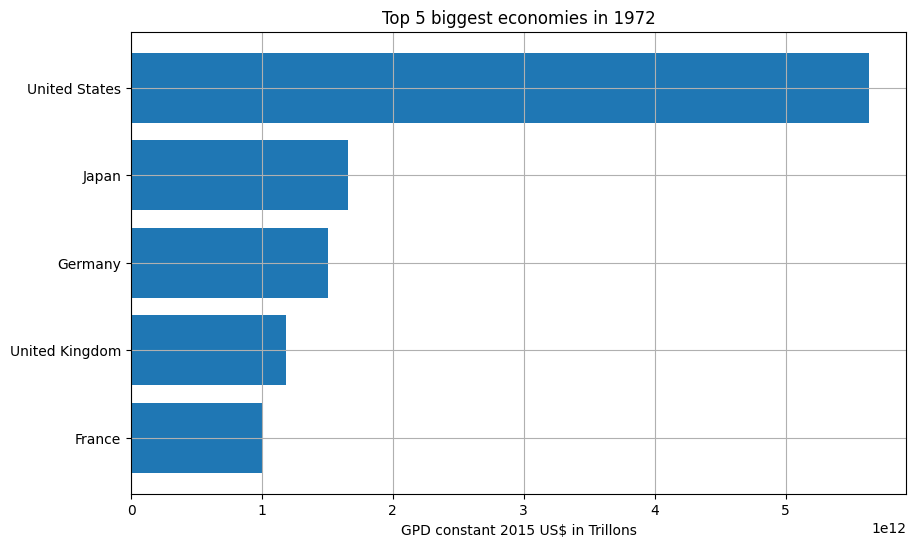

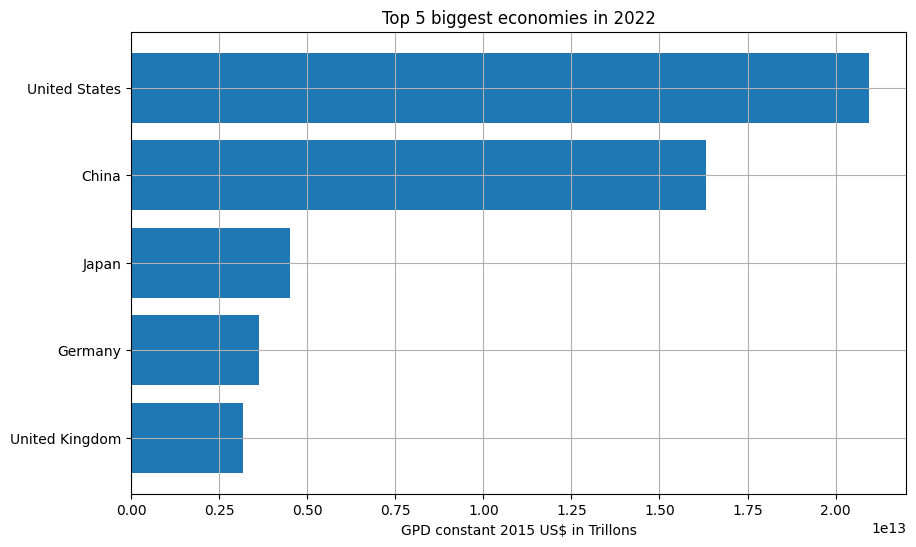

In [6]:
# Filter the dataframe
gdp_const_2015 = df[df['Series Name'] == 'GDP (constant 2015 US$)']

# Sort and retrieve the top 5 countries for 1972 and 2022
top_5_1972 = gdp_const_2015[['Country Name', '1972']].sort_values(by='1972', ascending=False).head(5)
top_5_2022 = gdp_const_2015[['Country Name', '2022']].sort_values(by='2022', ascending=False).head(5)

# Display the results
print("Top 5 biggest economies in 1972:")
print(top_5_1972)

print("\nTop 5 biggest economies in 2022:")
print(top_5_2022)

plot_gdp(top_5_1972, '1972', title = "Top 5 biggest economies in 1972", xlabel= 'GPD constant 2015 US$ in Trillons')

# Currently displays 1unit as 10trillion, need to modify
plot_gdp(top_5_2022, '2022', title = "Top 5 biggest economies in 2022", xlabel= 'GPD constant 2015 US$ in Trillons')

We can see that economies have increased almost 10fold for the period, that is visible by the scientific representation of the numbers on the x-axis, while we have 1e12 for 1972, or trillions of dollars, we move to 1e13 or 10s of trillions in 2022.

**2.** To look on the other side of the spectrum, we will now look at the top 5 poorest countries for the start and end of the period.

Top 5 poorest countries in 1972:
                       Country Name         1972
409                        Kiribati 112031037.70
737  St. Vincent and the Grenadines 240820327.74
677                      Seychelles 263702893.38
77                           Belize 269964377.17
285                     Gambia, The 302587263.61

Top 5 poorest countries in 2022:
              Country Name         2022
805                 Tuvalu  45116842.50
549                  Nauru 110322430.22
409               Kiribati 188123176.78
497       Marshall Islands 224606400.00
513  Micronesia, Fed. Sts. 314218029.14


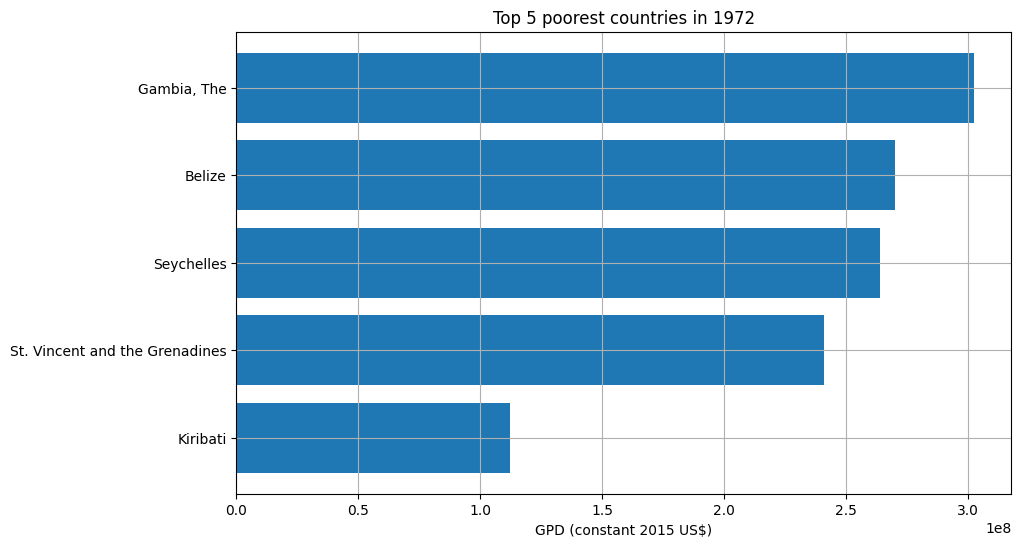

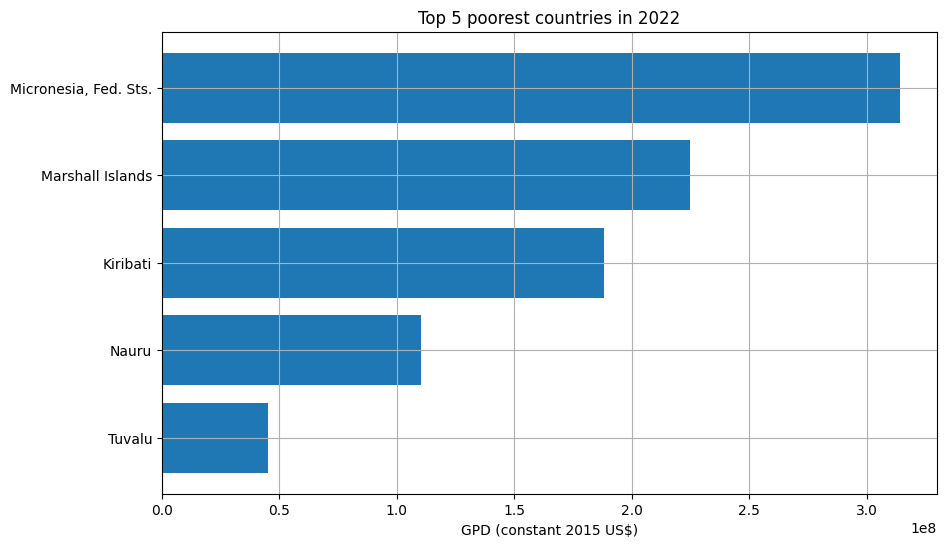

In [7]:
# Step 2 and 3: Sort and retrieve the poorest 5 countries for 1972 and 2022
poorest_5_1972 = gdp_const_2015[['Country Name', '1972']].sort_values(by='1972', ascending=True).head(5)
poorest_5_2022 = gdp_const_2015[['Country Name', '2022']].sort_values(by='2022', ascending=True).head(5)

# Display the numerical results
print("Top 5 poorest countries in 1972:")
print(poorest_5_1972)

print("\nTop 5 poorest countries in 2022:")
print(poorest_5_2022)

# Plotting the results
plot_gdp(poorest_5_1972, '1972', title="Top 5 poorest countries in 1972")
plot_gdp(poorest_5_2022, '2022', title="Top 5 poorest countries in 2022")


The analysis from problem 1 does not hold here, as the poorest country in 2022 is twice as poor compared to the poorest country in 1972.

**3.** Moving on, we will calculate the mean, median, standard deviation and mode for GDP per capita for every 10 years starting at 1972.

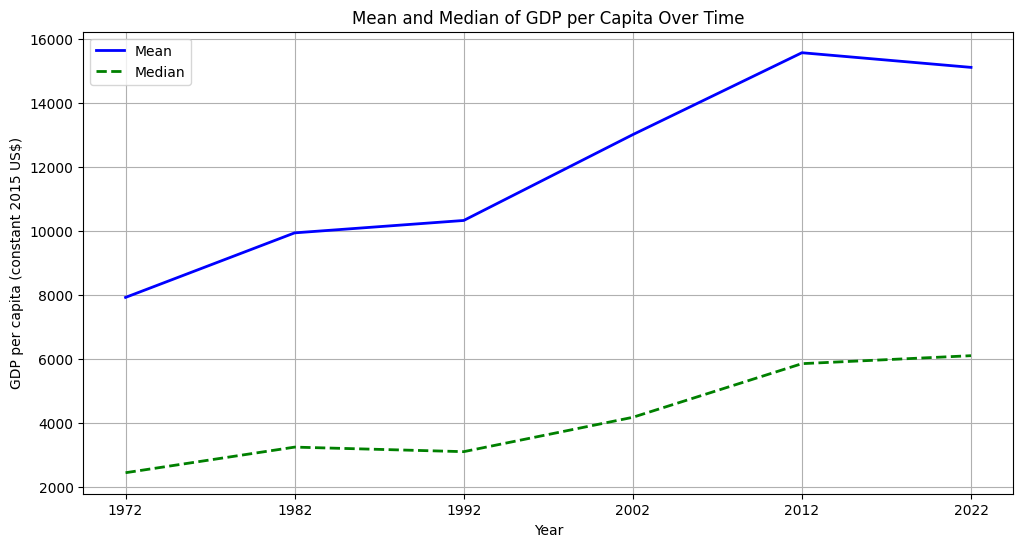

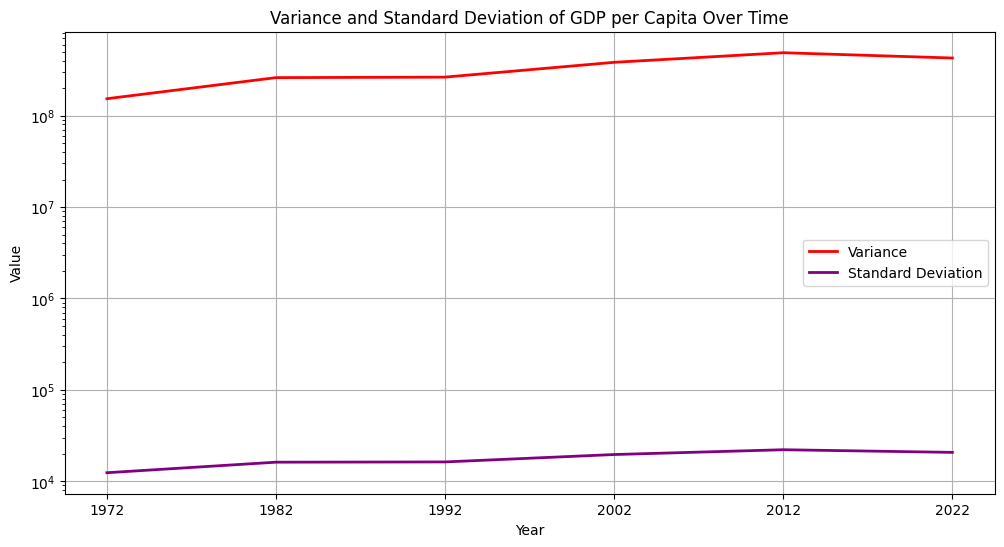

In [8]:
gdp_per_capita = df[df['Series Name'] == 'GDP per capita (constant 2015 US$)']

years = ['1972', '1982', '1992', '2002', '2012', '2022']

metrics = {
    'Year': [],
    'Mean': [],
    'Median': [],
    'Variance': [],
    'Standard Deviation': []
}

# Calculate the metrics for each year and store them in the dictionary
for year in years:
    metrics['Year'].append(year)
    metrics['Mean'].append(gdp_per_capita[year].mean())
    metrics['Median'].append(gdp_per_capita[year].median())
    metrics['Variance'].append(gdp_per_capita[year].var())
    metrics['Standard Deviation'].append(gdp_per_capita[year].std())

# Convert the dictionary into a DataFrame
metrics_df = pd.DataFrame(metrics)

# Plotting the line graphs
# Plot for Mean and Median
plt.figure(figsize=(12, 6))
plt.plot('Year', 'Mean', data=metrics_df, marker='', color='blue', linewidth=2, label='Mean')
plt.plot('Year', 'Median', data=metrics_df, marker='', color='green', linewidth=2, linestyle='dashed', label='Median')
plt.legend()
plt.title('Mean and Median of GDP per Capita Over Time')
plt.xlabel('Year')
plt.ylabel('GDP per capita (constant 2015 US$)')
plt.grid(True)
plt.show()

# Plot for Variance and Standard Deviation
plt.figure(figsize=(12, 6))
plt.plot('Year', 'Variance', data=metrics_df, marker='', color='red', linewidth=2, label='Variance')
plt.plot('Year', 'Standard Deviation', data=metrics_df, marker='', color='purple', linewidth=2, label='Standard Deviation')
plt.legend()
plt.title('Variance and Standard Deviation of GDP per Capita Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.yscale('log')  # Using a logarithmic scale for better visualization
plt.grid(True)
plt.show()

To gain a better representation of the results, we split the metrics into *Central Tendencies* and *Dispersion Metrics*. To gain even better insight, we take the logarithmic scale for visualisation of the dispersion metrics.

Also, since GDP values are all unique, considering the mode proves to be diffiuclt, maybe there can be some way to aggregate values to find an approximation of the mode, but this will be included in later updates of the notebook.

**4.** The next problem is quite straightforward, we need to represent GDP per capita for 1972 and 2022 using histograms.

We will utalize our helper functions and plot the 2 histograms with only 2 lines.

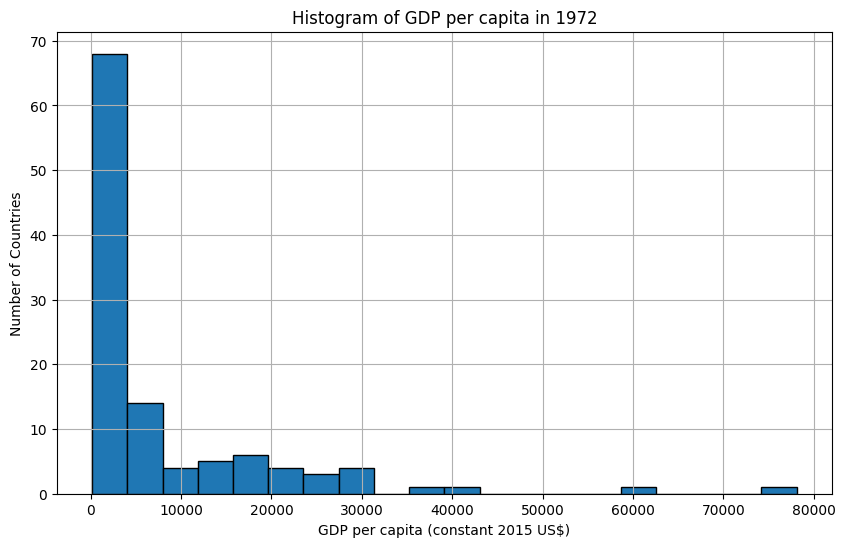

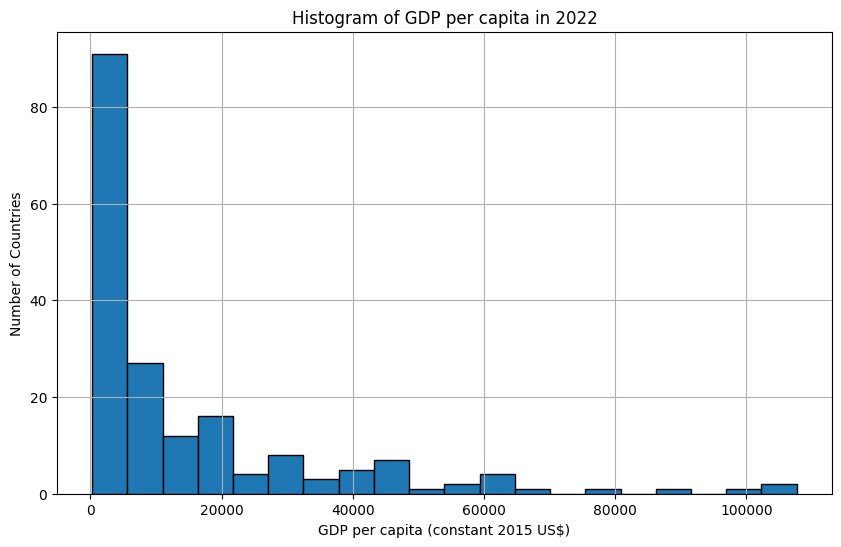

In [9]:
plot_histogram(gdp_per_capita, '1972')
plot_histogram(gdp_per_capita, '2022')

**5.** Our next task is to compare the ratio of GDP per capita of a representitive of the richest and one of the poorest country for every decade in our dataset.

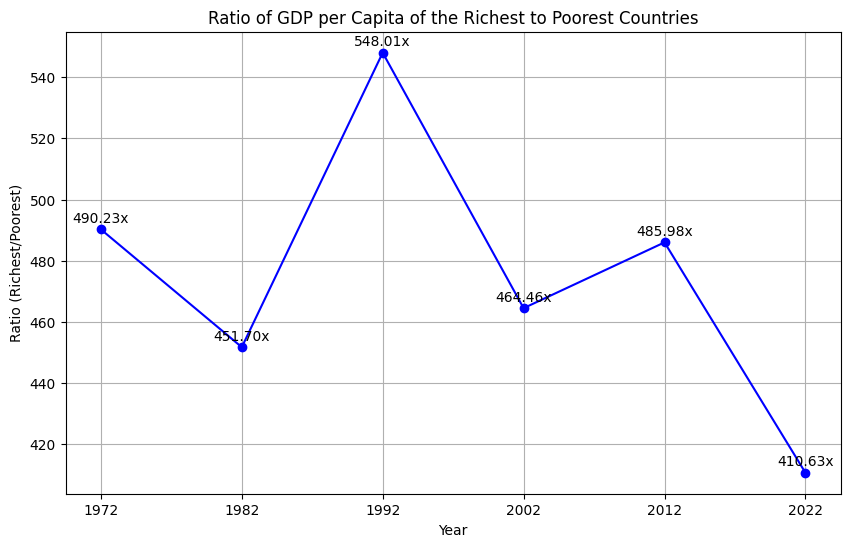

In [10]:
year_ratio_data = {
    'Year': [],
    'Ratio': []
}

# Calculate the ratios for each year
for year in years:
    max_gdp = gdp_per_capita[year].max()
    min_gdp = gdp_per_capita[year].min()

    if pd.notna(max_gdp) and pd.notna(min_gdp) and min_gdp != 0:
        ratio = max_gdp / min_gdp
        year_ratio_data['Year'].append(year)
        year_ratio_data['Ratio'].append(ratio)
    else:
        print(f"Could not calculate the ratio for {year} due to missing or zero values.")

# Convert the dictionary to a DataFrame for easier plotting
year_ratio_df = pd.DataFrame(year_ratio_data)

# Plotting the ratios over the years
plt.figure(figsize=(10, 6))
plt.plot(year_ratio_df['Year'], year_ratio_df['Ratio'], marker='o', linestyle='-', color='blue')

# Annotate each dot with its ratio value
for i, txt in enumerate(year_ratio_df['Ratio']):
    plt.annotate(f"{txt:.2f}x", # text to show (formatted to 2 decimal places)
                 (year_ratio_df['Year'][i], year_ratio_df['Ratio'][i]), # point to annotate
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.title('Ratio of GDP per Capita of the Richest to Poorest Countries')
plt.xlabel('Year')
plt.ylabel('Ratio (Richest/Poorest)')
plt.grid(True)
plt.show()

Despite GDP differences growing wider for the period, GDP per capita differences between richest and poorest countries has shrunk.

**6.** We will now look at some comparison of the GDP per capita of the authors country of birth Bulgaria and how it ranks in each decade.

No data available for Bulgaria in 1972.


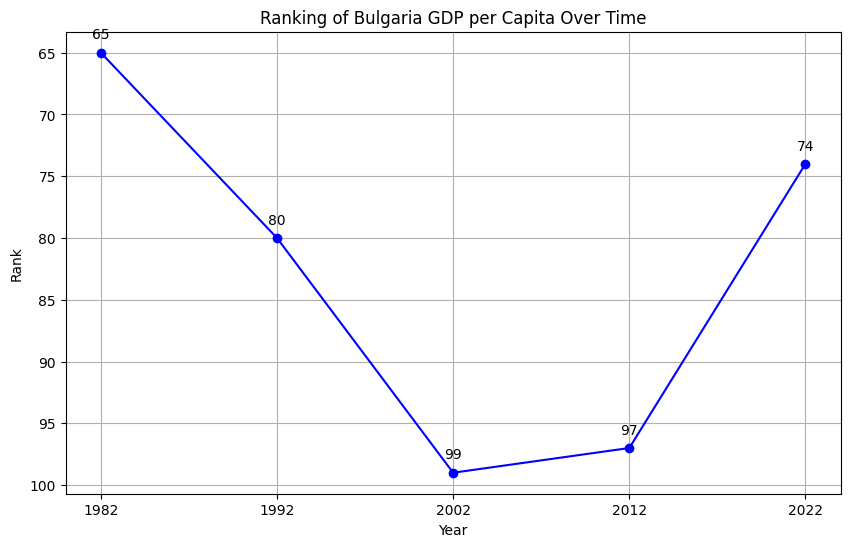

In [11]:
# Initialize a list to store the year and Bulgaria's ranking information
bulgaria_rank_data = {
    'Year': [],
    'Rank': []
}

# Calculate the rankings for each year
for year in years:
    # Dropping NaN values for accurate ranking
    sorted_data = gdp_per_capita.dropna(subset=[year]).sort_values(by=year, ascending=False).reset_index()
    
    # Finding the rank of Bulgaria
    bulgaria_data = sorted_data[sorted_data['Country Name'] == 'Bulgaria']
    
    if not bulgaria_data.empty:
        bulgaria_rank = bulgaria_data.index.item() + 1
        bulgaria_rank_data['Year'].append(year)
        bulgaria_rank_data['Rank'].append(bulgaria_rank)
    else:
        print(f"No data available for Bulgaria in {year}.")

# Convert the dictionary to a DataFrame for easier plotting
bulgaria_rank_df = pd.DataFrame(bulgaria_rank_data)

# Plotting the ranks over the years
plt.figure(figsize=(10, 6))
plt.plot(bulgaria_rank_df['Year'], bulgaria_rank_df['Rank'], marker='o', linestyle='-', color='blue')

# Annotate each dot with its rank value
for i, rank in enumerate(bulgaria_rank_df['Rank']):
    plt.annotate(f"{rank}", # text to show (the rank)
                 (bulgaria_rank_df['Year'][i], bulgaria_rank_df['Rank'][i]), # point to annotate
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.title('Ranking of Bulgaria GDP per Capita Over Time')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.gca().invert_yaxis()  # Invert y-axis so that the lowest rank is at the top
plt.grid(True)
plt.show()


**7.** Now we will compare Bulgaria to the richest country.

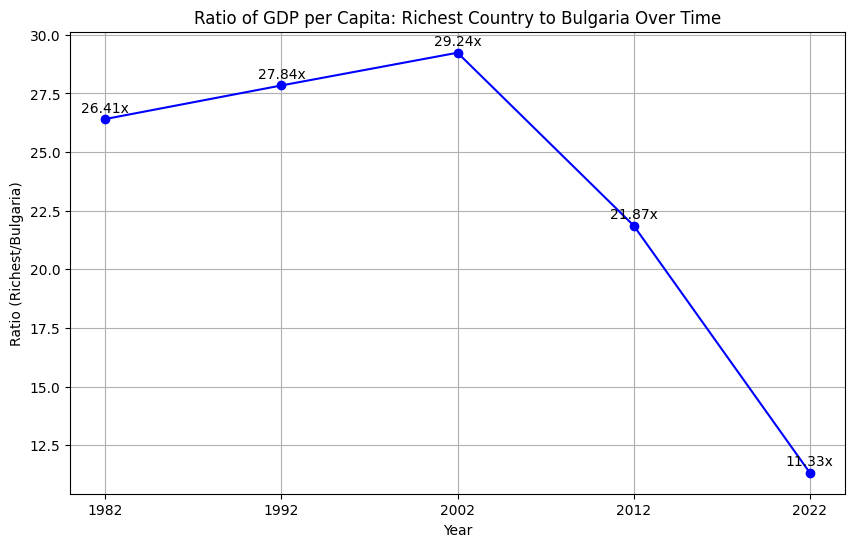

In [12]:
# Initialize a list to store the year and ratio information
bulgaria_to_richest_ratio_data = {
    'Year': [],
    'Ratio': []
}

# Calculate the ratios for each year
for year in years:
    # Find the maximum GDP per capita for each year
    max_gdp = gdp_per_capita[year].max()
    
    # Find the GDP per capita of Bulgaria for each year
    bulgaria_gdp_series = gdp_per_capita[gdp_per_capita['Country Name'] == 'Bulgaria'][year]
    bulgaria_gdp = bulgaria_gdp_series.values[0] if not bulgaria_gdp_series.empty else None
    
    # Calculate the ratio if both values are available and bulgaria_gdp is not zero
    if pd.notna(max_gdp) and pd.notna(bulgaria_gdp) and bulgaria_gdp != 0:
        ratio = max_gdp / bulgaria_gdp
        bulgaria_to_richest_ratio_data['Year'].append(year)
        bulgaria_to_richest_ratio_data['Ratio'].append(ratio)

# Convert the list into a DataFrame
bulgaria_to_richest_ratio_df = pd.DataFrame(bulgaria_to_richest_ratio_data)

# Plotting the ratios over the years
plt.figure(figsize=(10, 6))
plt.plot(bulgaria_to_richest_ratio_df['Year'], bulgaria_to_richest_ratio_df['Ratio'], marker='o', linestyle='-', color='blue')

# Annotate each dot with its ratio value
for i, ratio in enumerate(bulgaria_to_richest_ratio_df['Ratio']):
    plt.annotate(f"{ratio:.2f}x",
                 (bulgaria_to_richest_ratio_df['Year'][i], bulgaria_to_richest_ratio_df['Ratio'][i]),
                 textcoords="offset points",
                 xytext=(0,5),
                 ha='center')

plt.title('Ratio of GDP per Capita: Richest Country to Bulgaria Over Time')
plt.xlabel('Year')
plt.ylabel('Ratio (Richest/Bulgaria)')
plt.grid(True)
plt.show()

Good news, we are only 11 times poorer, instead of 26 times as in 1982. :)))))

An important remark, we start from 1982, as Bulgaria does not have data for 1972.

**8.** Now let's see how we fair against the poorest countries.

Could not calculate the ratio for 1972 due to missing or zero values.


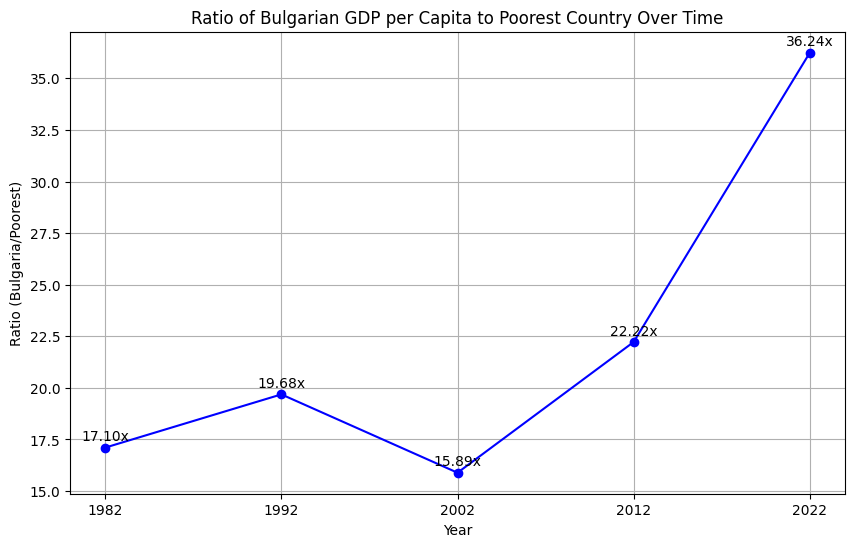

In [13]:
# Initialize a list to store the year and Bulgaria's ratio information
bulgaria_ratio_data = {
    'Year': [],
    'Ratio': []
}

# Calculate the ratios for each year
for year in years:
    # Extract the GDP per capita for Bulgaria for the given year
    bulgaria_gdp = gdp_per_capita[gdp_per_capita['Country Name'] == 'Bulgaria'][year].values[0] if not gdp_per_capita[gdp_per_capita['Country Name'] == 'Bulgaria'][year].empty else None
    # Find the minimum GDP per capita for each year
    min_gdp = gdp_per_capita[year].min()
    
    # Calculate the ratio if both values are available and min_gdp is not zero
    if pd.notna(min_gdp) and pd.notna(bulgaria_gdp) and min_gdp != 0:
        ratio = bulgaria_gdp / min_gdp
        bulgaria_ratio_data['Year'].append(year)
        bulgaria_ratio_data['Ratio'].append(ratio)
    else:
        print(f"Could not calculate the ratio for {year} due to missing or zero values.")

# Convert the list into a DataFrame
bulgaria_ratio_df = pd.DataFrame(bulgaria_ratio_data)

# Plotting the ratios over the years
plt.figure(figsize=(10, 6))
plt.plot(bulgaria_ratio_df['Year'], bulgaria_ratio_df['Ratio'], marker='o', linestyle='-', color='blue')

# Annotate each dot with its ratio value
for i, ratio in enumerate(bulgaria_ratio_df['Ratio']):
    plt.annotate(f"{ratio:.2f}x", # text to show (formatted to 2 decimal places)
                 (bulgaria_ratio_df['Year'][i], bulgaria_ratio_df['Ratio'][i]), # point to annotate
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.title('Ratio of Bulgarian GDP per Capita to Poorest Country Over Time')
plt.xlabel('Year')
plt.ylabel('Ratio (Bulgaria/Poorest)')
plt.grid(True)
plt.show()

**9.** Now we will take a look at growth rates from 1972 to 2022.

Using the AAGR helper function, for which the formula is: (GPD_T/GPD_0)^1/n - 1

/tmp/ipykernel_32/1927578185.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_per_capita_dropped['AAGR 1972-2022'] = gdp_per_capita_dropped.apply(lambda row: calculate_aagr(row['1972'], row['2022'], 50), axis=1)


The average annual growth rate for all countries from 1972 to 2022 is 1.53%. 



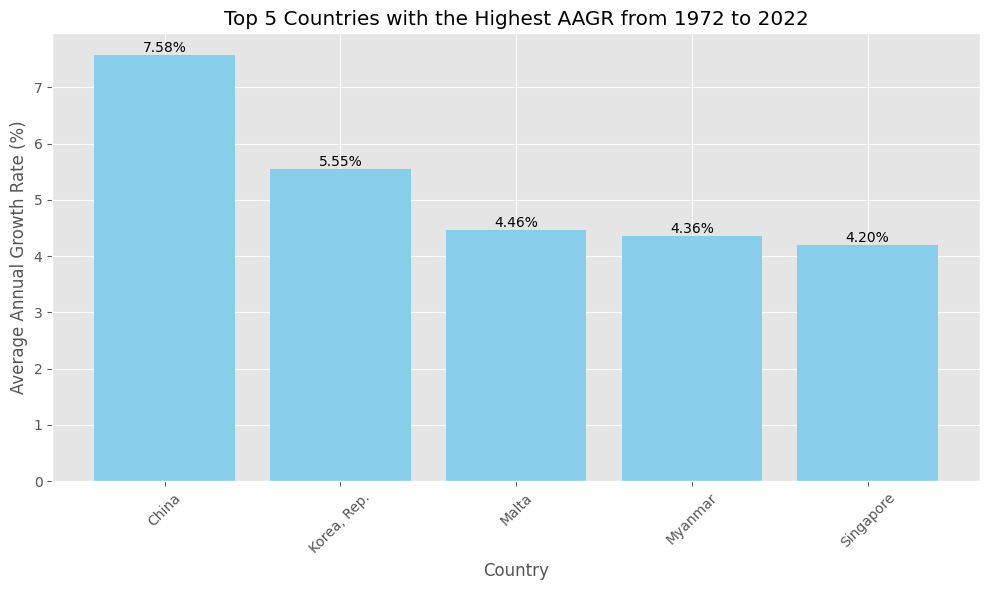

In [14]:
# Dropping rows with missing values
gdp_per_capita_dropped = gdp_per_capita.dropna(subset=['1972', '2022'])

# Calculating AAGR for each country
gdp_per_capita_dropped['AAGR 1972-2022'] = gdp_per_capita_dropped.apply(lambda row: calculate_aagr(row['1972'], row['2022'], 50), axis=1)

# Displaying the results
average_aagr_all_countries = gdp_per_capita_dropped['AAGR 1972-2022'].mean()

print(f"The average annual growth rate for all countries from 1972 to 2022 is {average_aagr_all_countries:.2f}%. \n")

# Sorting the DataFrame based on 'AAGR 1972-2022' in descending order and getting the top five countries
top_5_countries_highest_aagr = gdp_per_capita_dropped.nlargest(5, 'AAGR 1972-2022')[['Country Name', 'AAGR 1972-2022']]

plt.style.use('ggplot')

# Create a bar plot for the top 5 countries' AAGR
plt.figure(figsize=(10, 6))
plt.bar(top_5_countries_highest_aagr['Country Name'], top_5_countries_highest_aagr['AAGR 1972-2022'], color='skyblue')

# Annotate each bar with the AAGR value
for i, row in top_5_countries_highest_aagr.iterrows():
    plt.text(row['Country Name'], row['AAGR 1972-2022'], f"{row['AAGR 1972-2022']:.2f}%", ha='center', va='bottom')

plt.title('Top 5 Countries with the Highest AAGR from 1972 to 2022')
plt.xlabel('Country')
plt.ylabel('Average Annual Growth Rate (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

No suprises here, apart from Myanmar, but that is just my ignorance.

**10.** What was the annual growth rate for Bulgaria in this period?

In [15]:
# Extracting the GDP per capita for Bulgaria in 1982 and 2022
beginning_value = gdp_per_capita.loc[gdp_per_capita['Country Name'] == 'Bulgaria', '1982'].values[0]
ending_value = gdp_per_capita.loc[gdp_per_capita['Country Name'] == 'Bulgaria', '2022'].values[0]

# Calculate the AAGR for Bulgaria from 1982 to 2022
bulgaria_aagr = calculate_aagr(beginning_value, ending_value, 2022 - 1982)  # 40 years between 1982 and 2022

print(f"The Average Annual Growth Rate (AAGR) for Bulgaria from 1982 to 2022 is: {bulgaria_aagr:.2f}%")


The Average Annual Growth Rate (AAGR) for Bulgaria from 1982 to 2022 is: 2.41%


**11.** Our final task is to classify countries into 3 categories,Rich, Middle and Poor and see what % does each category takes.

Looking at the histogram, it seems that the first clutter of >10,000 can be defined as poor, while the end of the series before the outliers can be considered as rich, outliers obviously being rich as well.

/tmp/ipykernel_32/565970334.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_per_capita['Category'] = 'Middle-income'  # Default category


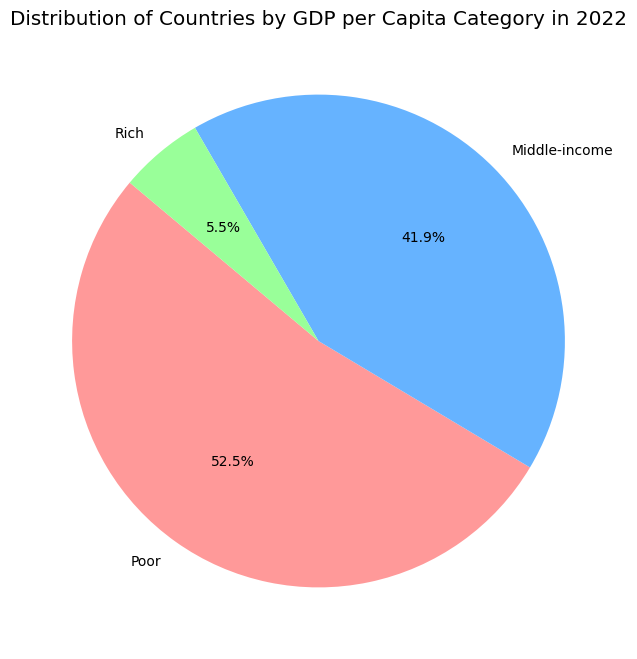

In [16]:
# Define thresholds
poor_threshold = 10000
rich_threshold = 50000

# Categorize countries
gdp_per_capita['Category'] = 'Middle-income'  # Default category
gdp_per_capita.loc[gdp_per_capita['2022'] < poor_threshold, 'Category'] = 'Poor'
gdp_per_capita.loc[gdp_per_capita['2022'] > rich_threshold, 'Category'] = 'Rich'

# Calculate the number of countries in each category
category_counts = gdp_per_capita['Category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Countries by GDP per Capita Category in 2022')
plt.show()


## <span style="color:#FA8072"> 5. Analysis </span> <a class="anchor" id="analysis"></a>

**What are the determinants of economic growth?**
Economic growth is largely determined by three core factors: labor, capital, and technological progress. Typically, wealthier nations have a substantial capital base, which contributes to a higher production elasticity of capital, and are at the forefront of technological advancement. In contrast, poorer countries tend to have economies that are more labor-intensive, reflecting a higher production elasticity of labor, and often lag in technological development.

**Suprising poorer or richer than expected countries (personal opinion). Predictions on countries expected to be rich in 2027.**
I was suprised to find that Romania and Greenland are considered a High income economies, also Libya is considered a higher middle income, which also came as a suprise.

As for predictions, due to the unstable political and economic landscape it's hard to say, it may be controversial, but I see a scenario in which India and China may be considered rich economies by 2027. Also countries like the Philippines, with an above average AAGR and GPD per capita may continue to trend upwards. 

**Provide a personal definition of poverty. How do you define a poor country? How would you define a poor community? How would you define a poor household?**

**Poverty** means not having enough to meet basic needs like food, water, shelter, and healthcare. It's about more than just low income—it's also about not having the resources or chances to improve one's position in society.

**Poor Country** is one where many people can't get what they need to live a decent life. It's not just about low income per person but also about big gaps between rich and poor, bad roads and schools, and few jobs.

**Poor Communities** has run-down homes and lacks good schools, hospitals, and ways to get around. People often feel left out and can't find good work.

**Poor Households** struggle to buy food, clothes, and medicine and can't afford to send the kids to school or save money for the future. In other words locked in budgeting for a very small timeframes, not being able to build even a foundation for generational wealth.

**Personal definition of inequality. How would you define the inequality/equality in a given economy? How would you define the inequality/equality in the world?**

**Inequality** means an uneven distribution of opportunities, wealth, and power among people. It's about how resources and chances to succeed are not the same for everyone.

**Inequality in an Economy:** In a given economy, inequality can be seen when there's a big gap between the rich and poor. It's not just about money but also about who gets to have good education, healthcare, and jobs.

**Inequality in the World:** Globally, inequality exists when some countries enjoy high standards of living, advanced healthcare, and technology, while others struggle with poverty and lack of basic services. It's about the vast differences in quality of life across different parts of the world. The main problem of our market economy.

**Does economic growth reduce poverty? Explain why using economic theory and empirical evidence.**

Upon doing a small research on the quesiton, I found the **Kuznets Curve**.
**Kuznets Curve:** It suggests that as an economy develops, inequality first increases and then decreases. Initially, a few sectors of the economy grow rapidly, benefiting a small part of the population. Over time, the benefits of growth spread more widely, reducing inequality and poverty.

The impact of growth on poverty reduction is stronger when growth is inclusive. For instance, growth in sectors employing large numbers of poor people (like agriculture in many low-income countries) can have a more direct effect on poverty.

**Do you consider yourself coming from a poor country?**

In Bulgaria, there's a cultural tendency to view ourselves as poor. This could stem from various factors, including a national temperament, a nostalgia for a more prosperous past, or perhaps it's just a common national pastime to indulge in self-pity—a notion that is not without empirical support.

Nevertheless, the actual data paints a different picture. We are classified as an upper-middle-income country, and when we compare ourselves to the lowest quintile of global economies, our job market, healthcare system, and education sector are significantly more advanced.

A friend from Aruba once told me, "We may be broke, my friend, but we are not poor." My view of Bulgaria aligns with that. We might be financially strapped, but we are not impoverished. This perspective isn't rooted in economic analysis but rather a humanistic one. Perhaps it's optimistic, but I believe we possess the opportunities to elevate our economy to a wealthy status in the coming decades. It's not the individual potential that's lacking; Bulgarians have the capacity to excel across various fields, as our history has shown to some extent. What's missing is the collective mindset to propel us forward, and in that respect, we seem more lost now than we were 150 years ago.

**How old would you be in 2050? Which will be the richest economies in 2050? What would you assume about the economic development of your country in 2050? Using economic theory and empirical evidence, elaborate more on why you expect your country to be richer or poorer than it is today: how various economic factors (like investments, savings, debt, labour participation, human capital, physical capital, technological development, etc.) would or could lead to this outcome?**

I will be 50 years old in 2050, maybe then I will be able to answer the question which country will be the richest in 2080, but I highly doubt that. I can say that it would be some of the Northern European countries, like Ireland with 4% AAGR, or Singapore, again due their 4% AAGR, but I have a confidence interval of 0 to 1% on that, so it doesn't mean much. Evolution works because there are unexpected mutations, in Dostoyevsky's novel the Brothers Karamazov the devil tells Ivan: "I, for instance, simply ask for annihiliation *(his own, not of humanity)*. No, live, I am told, for there'd be nothing without you. If everything in the universe were sensible, nothing would happen. There would be no events without you, and there must be events. So against the grain I serve to produce events and do what's irrational because I am commanded to. For all their indisputable intelligence, men take this farce as something serious, and that is their tragedy." I put this quote here to strengthen my point, that making predictions for such a long time in the future is just nonsense, humans will act irrationaly, black swans will happen, so might as well look at the ceiling and say that Bulgaria will be the richest country in 2050.

**Name a movie and a song that was released in 1972, 1982, 1992, 2002, 2012, 2022**

1972
Movie: "The Godfather"
Song: "Rocket Man" by Elton John

1982:
Movie: "E.T. the Extra-Terrestrial"
Song: "Eye of the Tiger" by Survivor

1992:
Movie: "Aladdin"
Song: "I Will Always Love You" by Whitney Houston

2002:
Movie: "The Lord of the Rings: The Two Towers"
Song: "Lose Yourself" by Eminem

2012:
Movie: "The Hunger Games"
Song: "Somebody That I Used to Know" by Gotye feat. Kimbra

2022:
Movie: "Don't Worry Darling"
Song: "I'm Good (BLUE)" David Guetta & Bebe Rexha

**What has changed in movies/music over the period 1972-2022? What has changed in the economies all over the world during the last 40 years**

Common trends in changes between movies/music and economies are:
1. Digital Transformation
The shift from analog to digital is perhaps the most pervasive trend across both sectors. In entertainment, this has changed everything from production to distribution. Economies have seen the digital revolution upend traditional industries and create new ones.
2. Globalization
Both entertainment and economies have become more global. Movies and music stars now have international audiences, and similarly, economic activity is increasingly conducted on a global scale, with companies operating and competing internationally. Everyone CEO wants an international corporation.

3. Diversification and Inclusion
Just as movies and music have become more inclusive in terms of representation, economies have diversified with emerging markets gaining prominence and contributing more to global growth.

4. Innovation and Technological Adancements
Special effects in films, digital music production, and the rise of tech companies have driven changes in consumer experiences and expectations, which have, in turn, influenced economies.

**What do you consider to be the most important determinant of GDP growth over the last decades? How exactly it affected the economic growth? What was the impact of this factor on the economic growth in your country?**

Given that we have a technology multiplier in the Cobb Douglas production function and the digital revolution that has taken place in the last 20-25 years, it's fair to say that it has been the biggest factor of economic growth.

The impact on Bulgaria, I believe is huge and not fully realized yet. There are numerous sources [1](https://distantjob.com/blog/countries-to-find-best-programmers/#:~:text=On%20the%20overall%20score%2C%20China,when%20it%20comes%20to%20algorithms), [2](https://newxel.com/blog/software-development-bulgaria/#:~:text=A%20recent%20survey%20by%20Hackernoon%2C,players%20in%20the%20tech%20industry), which rank Bulgarians among the top software engineers in the world, combined with our cheap labor market, we could be a lucrative market for foreign investments. This includes my personal experience of observing more and more people getting interested in a coding careers around me. 

**Guess what is the meaning of the title abbreviation Б&Б!**

Баланси и балади. Балансите са числата и всичката информация на света за държавите които разглеждаме. Балади, защото въпросите ме вкараха в романтизиране на идей и сценарии за бъдещето. 